#Building a song recommender


#Fire up GraphLab Create

In [1]:
import graphlab

#Load music data

In [2]:
song_data = graphlab.SFrame('song_data.gl/')

[INFO] This commercial license of GraphLab Create is assigned to engr@dato.com.

[INFO] Start server at: ipc:///tmp/graphlab_server-39959 - Server binary: /home/ubuntu/anaconda/lib/python2.7/site-packages/graphlab/unity_server - Server log: /tmp/graphlab_server_1440484920.log
[INFO] GraphLab Server Version: 1.5.2


#Explore data

Music data shows how many times a user listened to a song, as well as the details of the song.

In [3]:
song_data.head()

user_id,song_id,listen_count,title,artist
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOAKIMP12A8C130995,1,The Cove,Jack Johnson
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Paco De Lucia
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOBXHDL12A81C204C0,1,Stronger,Kanye West
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOBYHAJ12A6701BF1D,1,Constellations,Jack Johnson
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SODACBL12A8C13C273,1,Learn To Fly,Foo Fighters
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SODDNQT12A6D4F5F7E,5,Apuesta Por El Rock 'N'Roll ...,Héroes del Silencio
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SODXRTY12AB0180F3B,1,Paper Gangsta,Lady GaGa
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOFGUAY12AB017B0A8,1,Stacked Actors,Foo Fighters
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOFRQTD12A81C233C0,1,Sehr kosmisch,Harmonia
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOHQWYZ12A6D4FA701,1,Heaven's gonna burn youreyes ...,Thievery Corporationfeat. Emiliana Torrini ...


##Showing the most popular songs in the dataset

In [5]:
graphlab.canvas.set_target('ipynb')

In [6]:
song_data['song'].show()

In [7]:
len(song_data)

1116609

##Count number of unique users in the dataset

In [8]:
users = song_data['user_id'].unique()

In [9]:
len(users)

66346

#Create a song recommender

In [10]:
train_data,test_data = song_data.random_split(.8,seed=0)

##Simple popularity-based recommender

In [11]:
popularity_model = graphlab.popularity_recommender.create(train_data,
                                                         user_id='user_id',
                                                         item_id='song')

PROGRESS: Recsys training: model = popularity
PROGRESS: Warning: Ignoring columns song_id, listen_count, title, artist;
PROGRESS:     To use one of these as a target column, set target = <column_name>
PROGRESS:     and use a method that allows the use of a target.
PROGRESS: Preparing data set.
PROGRESS:     Data has 893580 observations with 66085 users and 9952 items.
PROGRESS:     Data prepared in: 0.582165s
PROGRESS: 893580 observations to process; with 9952 unique items.


###Use the popularity model to make some predictions

A popularity model makes the same prediction for all users, so provides no personalization.

In [12]:
popularity_model.recommend(users=[users[0]])

user_id,song,score,rank
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Sehr kosmisch - Harmonia,4754.0,1
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Undo - Björk,4227.0,2
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,You're The One - DwightYoakam ...,3781.0,3
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Dog Days Are Over (RadioEdit) - Florence + The ...,3633.0,4
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Revelry - Kings Of Leon,3527.0,5
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Horn Concerto No. 4 in Eflat K495: II. Romance ...,3161.0,6
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Secrets - OneRepublic,3148.0,7
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Hey_ Soul Sister - Train,2538.0,8
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Fireflies - CharttraxxKaraoke ...,2532.0,9
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Tive Sim - Cartola,2521.0,10


In [13]:
popularity_model.recommend(users=[users[1]])

user_id,song,score,rank
18fafad477f9d72ff86f7d0bd838a6573de0f64a ...,Sehr kosmisch - Harmonia,4754.0,1
18fafad477f9d72ff86f7d0bd838a6573de0f64a ...,Undo - Björk,4227.0,2
18fafad477f9d72ff86f7d0bd838a6573de0f64a ...,You're The One - DwightYoakam ...,3781.0,3
18fafad477f9d72ff86f7d0bd838a6573de0f64a ...,Revelry - Kings Of Leon,3527.0,4
18fafad477f9d72ff86f7d0bd838a6573de0f64a ...,Horn Concerto No. 4 in Eflat K495: II. Romance ...,3161.0,5
18fafad477f9d72ff86f7d0bd838a6573de0f64a ...,Secrets - OneRepublic,3148.0,6
18fafad477f9d72ff86f7d0bd838a6573de0f64a ...,Hey_ Soul Sister - Train,2538.0,7
18fafad477f9d72ff86f7d0bd838a6573de0f64a ...,Fireflies - CharttraxxKaraoke ...,2532.0,8
18fafad477f9d72ff86f7d0bd838a6573de0f64a ...,Tive Sim - Cartola,2521.0,9
18fafad477f9d72ff86f7d0bd838a6573de0f64a ...,Drop The World - LilWayne / Eminem ...,2053.0,10


##Build a song recommender with personalization

We now create a model that allows us to make personalized recommendations to each user. 

In [14]:
personalized_model = graphlab.item_similarity_recommender.create(train_data,
                                                                user_id='user_id',
                                                                item_id='song')

PROGRESS: Recsys training: model = item_similarity
PROGRESS: Warning: Ignoring columns song_id, listen_count, title, artist;
PROGRESS:     To use one of these as a target column, set target = <column_name>
PROGRESS:     and use a method that allows the use of a target.
PROGRESS: Preparing data set.
PROGRESS:     Data has 893580 observations with 66085 users and 9952 items.
PROGRESS:     Data prepared in: 0.545762s
PROGRESS: Computing item similarity statistics:
PROGRESS: Computing most similar items for 9952 items:
PROGRESS: +-----------------+-----------------+
PROGRESS: | Number of items | Elapsed Time    |
PROGRESS: +-----------------+-----------------+
PROGRESS: | 1000            | 1.1631          |
PROGRESS: | 2000            | 1.17152         |
PROGRESS: | 3000            | 1.17837         |
PROGRESS: | 4000            | 1.18494         |
PROGRESS: | 5000            | 1.19154         |
PROGRESS: | 6000            | 1.19805         |
PROGRESS: | 7000            | 1.20464         |

###Applying the personalized model to make song recommendations

As you can see, different users get different recommendations now.

In [15]:
personalized_model.recommend(users=[users[0]])

user_id,song,score,rank
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Riot In Cell Block NumberNine - Dr Feelgood ...,0.0375,1
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Sei Lá Mangueira -Elizeth Cardoso ...,0.0331632653061,2
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,The Stallion - Ween,0.0322580645161,3
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Rain - Subhumans,0.0315836298932,4
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,West One (Shine On Me) -The Ruts ...,0.0308947237126,5
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Back Against The Wall -Cage The Elephant ...,0.0301204819277,6
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Life Less Frightening -Rise Against ...,0.0284431137725,7
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,A Beggar On A Beach OfGold - Mike And The ...,0.0230283319543,8
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Audience Of One - RiseAgainst ...,0.0193938442211,9
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Blame It On The Boogie -The Jacksons ...,0.0189873417722,10


In [16]:
personalized_model.recommend(users=[users[1]])

user_id,song,score,rank
18fafad477f9d72ff86f7d0bd838a6573de0f64a ...,Rabbit Heart (Raise ItUp) - Florence + The ...,0.0799784005263,1
18fafad477f9d72ff86f7d0bd838a6573de0f64a ...,You've Got The Love -Florence + The Machine ...,0.0631955681494,2
18fafad477f9d72ff86f7d0bd838a6573de0f64a ...,Cosmic Love - Florence +The Machine ...,0.0576969532938,3
18fafad477f9d72ff86f7d0bd838a6573de0f64a ...,Bird Song - Florence +The Machine ...,0.0454307136369,4
18fafad477f9d72ff86f7d0bd838a6573de0f64a ...,Hardest Of Hearts -Florence + The Machine ...,0.0395565266061,5
18fafad477f9d72ff86f7d0bd838a6573de0f64a ...,Hospital Beds - Florence+ The Machine ...,0.0329747483511,6
18fafad477f9d72ff86f7d0bd838a6573de0f64a ...,Are You Hurting The OneYou Love? - Florence + ...,0.0326229110397,7
18fafad477f9d72ff86f7d0bd838a6573de0f64a ...,Bird Song Intro -Florence + The Machine ...,0.0291947023113,8
18fafad477f9d72ff86f7d0bd838a6573de0f64a ...,Hope - Apocalyptica,0.0245248011792,9
18fafad477f9d72ff86f7d0bd838a6573de0f64a ...,Girl With One Eye (BayouPercussion Version) - ...,0.0198634691527,10


###We can also apply the model to find similar songs to any song in the dataset

In [17]:
personalized_model.get_similar_items(['With Or Without You - U2'])

PROGRESS: Getting similar items completed in 0.012155


song,similar,score,rank
With Or Without You - U2,I Still Haven't FoundWhat I'm Looking For ...,0.0430327868852,1
With Or Without You - U2,Hold Me_ Thrill Me_ KissMe_ Kill Me - U2 ...,0.0338164251208,2
With Or Without You - U2,Window In The Skies - U2,0.0329341317365,3
With Or Without You - U2,Vertigo - U2,0.0301507537688,4
With Or Without You - U2,Sunday Bloody Sunday - U2,0.0272373540856,5
With Or Without You - U2,Bad - U2,0.0252707581227,6
With Or Without You - U2,A Day Without Me - U2,0.0238095238095,7
With Or Without You - U2,Another Time AnotherPlace - U2 ...,0.0204081632653,8
With Or Without You - U2,Walk On - U2,0.0202702702703,9
With Or Without You - U2,Get On Your Boots - U2,0.0197628458498,10


In [18]:
personalized_model.get_similar_items(['Chan Chan (Live) - Buena Vista Social Club'])

PROGRESS: Getting similar items completed in 0.010162


song,similar,score,rank
Chan Chan (Live) - BuenaVista Social Club ...,Murmullo - Buena VistaSocial Club ...,0.188118811881,1
Chan Chan (Live) - BuenaVista Social Club ...,La Bayamesa - Buena VistaSocial Club ...,0.187192118227,2
Chan Chan (Live) - BuenaVista Social Club ...,Amor de Loca Juventud -Buena Vista Social Club ...,0.184834123223,3
Chan Chan (Live) - BuenaVista Social Club ...,Diferente - Gotan Project,0.0214592274678,4
Chan Chan (Live) - BuenaVista Social Club ...,Mistica - Orishas,0.0205761316872,5
Chan Chan (Live) - BuenaVista Social Club ...,Hotel California - GipsyKings ...,0.019305019305,6
Chan Chan (Live) - BuenaVista Social Club ...,Nací Orishas - Orishas,0.0191570881226,7
Chan Chan (Live) - BuenaVista Social Club ...,Le Moulin - Yann Tiersen,0.0187969924812,8
Chan Chan (Live) - BuenaVista Social Club ...,Gitana - Willie Colon,0.0187969924812,9
Chan Chan (Live) - BuenaVista Social Club ...,Criminal - Gotan Project,0.018779342723,10


#Quantitative comparison between the models

We now formally compare the popularity and the personalized models using precision-recall curves. 

compare_models: using 2931 users to estimate model performance
PROGRESS: Evaluate model M0
PROGRESS: recommendations finished on 1000/2931 queries. users per second: 20048.5
PROGRESS: recommendations finished on 2000/2931 queries. users per second: 34748.8

Precision and recall summary statistics by cutoff
+--------+-----------------+-----------------+
| cutoff |  mean_precision |   mean_recall   |
+--------+-----------------+-----------------+
|   2    | 0.0349709996588 | 0.0182510739573 |
|   4    | 0.0279767997271 | 0.0285131307905 |
|   6    | 0.0247924485386 | 0.0372022633154 |
|   8    | 0.0215796656431 |  0.042821566299 |
|   10   | 0.0194131695667 | 0.0495469426892 |
|   12   | 0.0177413851928 | 0.0538938283181 |
|   14   | 0.0165959935663 | 0.0586733705848 |
|   16   | 0.0155876833845 | 0.0634761666364 |
|   18   | 0.0149171689602 | 0.0686549343791 |
|   20   | 0.0139542818151 | 0.0716375681447 |
+--------+-----------------+-----------------+
[10 rows x 3 columns]


[WARNING] Model trained without a target. Skipping RMSE computation.



PROGRESS: Evaluate model M1
PROGRESS: recommendations finished on 1000/2931 queries. users per second: 2484.1
PROGRESS: recommendations finished on 2000/2931 queries. users per second: 2500.64

Precision and recall summary statistics by cutoff
+--------+-----------------+-----------------+
| cutoff |  mean_precision |   mean_recall   |
+--------+-----------------+-----------------+
|   2    |  0.159501876493 | 0.0920211925826 |
|   4    |  0.125213237803 |  0.139657713246 |
|   6    |  0.10440122825  |  0.170624917548 |
|   8    | 0.0908819515524 |  0.195379376807 |
|   10   | 0.0810303650631 |  0.216241643305 |
|   12   | 0.0731263505061 |  0.232522562337 |
|   14   | 0.0671881854072 |  0.248410199089 |
|   16   | 0.0616257250085 |  0.257978290923 |
|   18   | 0.0576405474051 |  0.272700754762 |
|   20   | 0.0537871033777 |  0.282079795487 |
+--------+-----------------+-----------------+
[10 rows x 3 columns]


[WARNING] Model trained without a target. Skipping RMSE computation.


/home/ubuntu/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


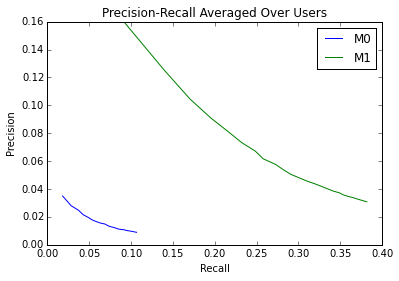

In [19]:
%matplotlib inline
model_performance = graphlab.recommender.util.compare_models(test_data,
                                                            [popularity_model,personalized_model],
                                                            user_sample=0.05)

The curve shows that the personalized model provides much better performance. 